## pkl 파일 불러오기

In [2]:
import pickle
import pandas as pd

# 파일 경로
file_path = './doc2vec/vector_df_0510.pkl'

# 파일 불러오기 후 DataFrame으로 변환
with open(file_path, 'rb') as f:
    df = pickle.load(f)

df = pd.DataFrame(df)
print(f"✅ 파일 로드 및 DataFrame 변환 완료, shape: {df.shape}")

✅ 파일 로드 및 DataFrame 변환 완료, shape: (88766, 7)


In [3]:
df.head()

,source,search_words,url,title,contents,tagged_contents,vector
0,블로그,아기+잠깨,https://blog.naver.com/srhymin/223091161466,NaN,저희 아기는 신생아때부터 청각과 촉각이 예민해 잠도 깊게 못 잘 뿐더러 잠투정이 정...,"[저희, 아기, 신생아, 때, 청각, 촉각, 잠도, 못, 뿐더러, 잠투, 정이, 정...","[0.18305127, -1.2801502, -0.44998685, 0.799018..."
1,블로그,아기+잠깨,https://blog.naver.com/sukm83/223091879514,NaN,정신없는 주방한켠 뒤죽박죽 알 수 없는 용기에 양념과 소스가 담겨져 있기에 주방이 ...,"[정신, 방한, 뒤죽박죽, 알, 수, 용기, 양념, 소스, 주방, 이번, 양념, 통...","[3.5914354, -2.2061694, 1.5965343, 0.19793592,..."
2,블로그,아기+잠깨,https://blog.naver.com/dldptmf5134/223096875782,NaN,안녕하세요 지유맘입니다! 오늘은 지유가 이유식과 유아식 그 중간즈음 토핑식을 할 때...,"[지유, 맘, 오늘, 지유, 이유식, 유아식, 그, 중간, 즈음, 토핑식, 때, 정...","[0.3413881, -0.53281033, -1.3500248, 1.670243,..."
3,블로그,아기+잠깨,https://blog.naver.com/lia1100/223095799488,NaN,안녕하세요 라온엄마에요 오늘은 조금 특이한 아기 반찬을 준비했어요 방풍나물을 이용한...,"[엄마, 오늘, 조금, 아기, 반찬, 준비, 방, 나물, 이용, 방, 나물, 된장,...","[0.9519698, -1.2839632, -0.3893606, -0.1345413..."
4,블로그,아기+잠깨,https://blog.naver.com/perfect_aj/223095824533,NaN,6 12개월 아기의 1일 권장 물섭취량은 220ml정도라고 한다. 음 우래기는.. ...,"[개월, 아기, 권장, 물섭취량, 정도, 음, 우리, 애기, 생각, 물, 물병, 번...","[0.47277522, -0.9469169, 1.0451334, -0.1203481..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88766 entries, 0 to 88765
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   source           88766 non-null  object
 1   search_words     88766 non-null  object
 2   url              81327 non-null  object
 3   title            30446 non-null  object
 4   contents         88766 non-null  object
 5   tagged_contents  88766 non-null  object
 6   vector           88766 non-null  object
dtypes: object(7)
memory usage: 4.7+ MB


### 사용할 벡터 지정

In [5]:
doc_vectors = list(df['vector'])

### scatter 시각화

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap

In [7]:
doc_vectors_array = np.array(doc_vectors)
print(f"원본 Doc2Vec 벡터 shape: {doc_vectors_array.shape}")

원본 Doc2Vec 벡터 shape: (88766, 200)


In [8]:
umap_model = umap.UMAP(n_neighbors=15,
                       n_components=2,
                       min_dist=0.1,
                       metric='cosine', # Doc2Vec에 적합
                       random_state=42,
                       verbose=False) # 간결하게 하려면 False

In [9]:
# 원본 벡터로 UMAP 학습 및 변환
umap_embedding = umap_model.fit_transform(doc_vectors_array)
print(f"UMAP 차원 축소 완료. 축소된 임베딩 shape: {umap_embedding.shape}")

/usr/local/Caskroom/miniconda/base/envs/dxschool/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/dxschool/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP 차원 축소 완료. 축소된 임베딩 shape: (88766, 2)


In [10]:
# UMAP 결과로 DataFrame 생성
umap_df = pd.DataFrame(umap_embedding, columns=['umap_x', 'umap_y'])

print("umap_df 생성 완료.")
print("umap_df shape:", umap_df.shape)
print("\numap_df head:")
print(umap_df.head())

umap_df 생성 완료.
umap_df shape: (88766, 2)

umap_df head:
     umap_x    umap_y
0  2.414665  1.605893
1 -3.148386 -0.240044
2 -3.018861 -0.708719
3 -3.009491 -0.874074
4  0.426729  2.627305



결과 시각화 (umap_df 사용)...


/var/folders/_j/ygr94mmx6rs09px9_pzz74100000gn/T/ipykernel_80509/882036262.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(umap_df['umap_x'],


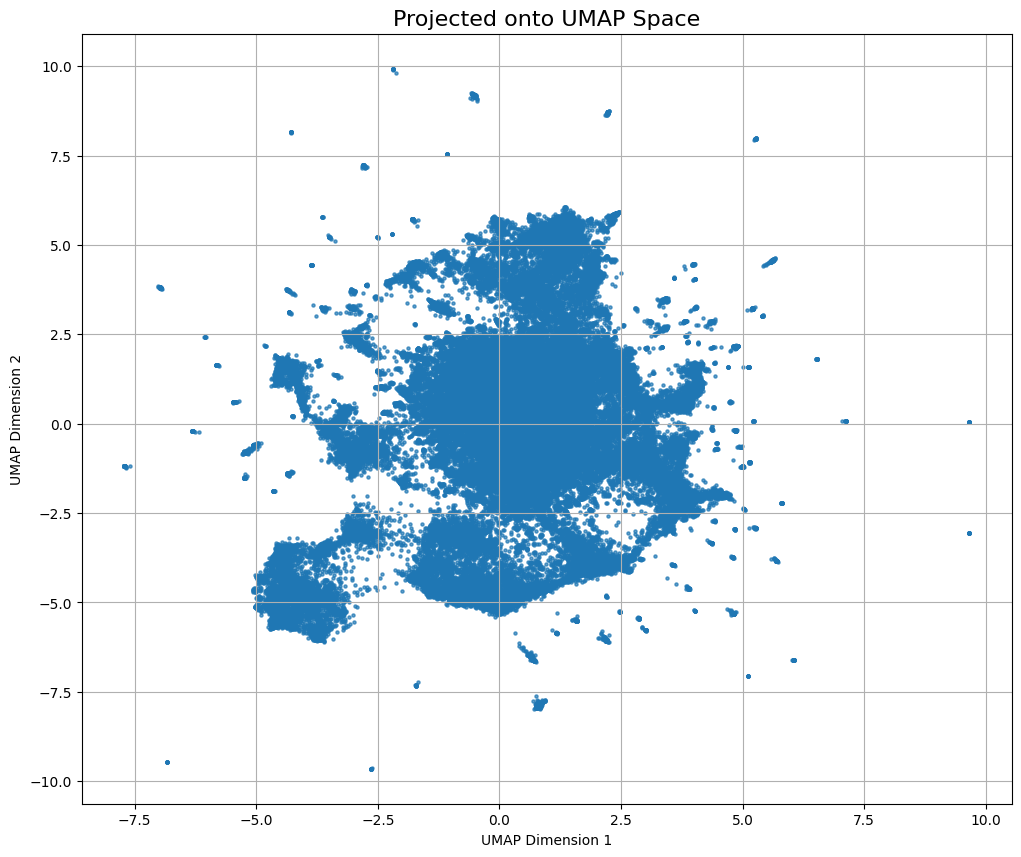

In [12]:
print("\n결과 시각화 (umap_df 사용)...")

plt.figure(figsize=(12, 10))
scatter = plt.scatter(umap_df['umap_x'],
                      umap_df['umap_y'],
                      cmap='Spectral',
                      s=5,
                      alpha=0.7)

plt.title('Projected onto UMAP Space', fontsize=16)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.grid(True)
plt.show()

## KMeans on UMAP

### 차원축소한 벡터 추출

In [13]:
if 'umap_embedding' in locals() and isinstance(umap_embedding, np.ndarray) and umap_embedding.shape[1] == 2:
    X_umap = umap_embedding
    print(f"UMAP 임베딩 사용. Shape: {X_umap.shape}")
elif 'df' in locals() and 'umap_x' in df.columns and 'umap_y' in df.columns:
    try:
        X_umap = df[['umap_x', 'umap_y']].values
        print(f"DataFrame에서 UMAP 좌표 추출. Shape: {X_umap.shape}")
    except Exception as e:
        print(f"DataFrame에서 UMAP 좌표 추출 중 오류: {e}")
        raise # 오류 발생시켜 중단
else:
    print("오류: UMAP 좌표 데이터('umap_embedding' 또는 df[['umap_x','umap_y']])를 찾을 수 없습니다.")
    raise NameError("UMAP 데이터 없음")

UMAP 임베딩 사용. Shape: (88766, 2)


### 엘보 메소드

In [33]:
from tqdm import tqdm

In [34]:
k_range = range(2, 11) # 테스트할 k의 범위 (예: 2부터 10까지)
inertias = []
silhouette_scores = []

print(f"\n최적의 k 탐색 중 (k={min(k_range)}부터 k={max(k_range)}까지)...")

for k in tqdm(k_range):
    # K-Means 모델 생성 및 학습
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels_temp = kmeans_temp.fit_predict(X_umap)

    # a) 관성 (Inertia / WCSS) 계산 - Elbow Method 용
    inertias.append(kmeans_temp.inertia_)

    # b) 실루엣 점수 계산 (UMAP 공간의 유클리드 거리 기준)
    try:
        if len(np.unique(labels_temp)) > 1: # 클러스터가 1개 이상일 때만 계산
             score = silhouette_score(X_umap, labels_temp, metric='euclidean') # UMAP 공간이므로 유클리드 사용
             silhouette_scores.append(score)
        else:
             silhouette_scores.append(np.nan) # 계산 불가 시 NaN
    except MemoryError:
        print(f"k={k}, 실루엣 점수 계산 중 메모리 오류 발생.")
        silhouette_scores.append(np.nan)
        # 필요시 여기서 break

print("\nk값 탐색 완료.")


최적의 k 탐색 중 (k=2부터 k=10까지)...


100%|██████████| 9/9 [08:02<00:00, 53.63s/it]


k값 탐색 완료.


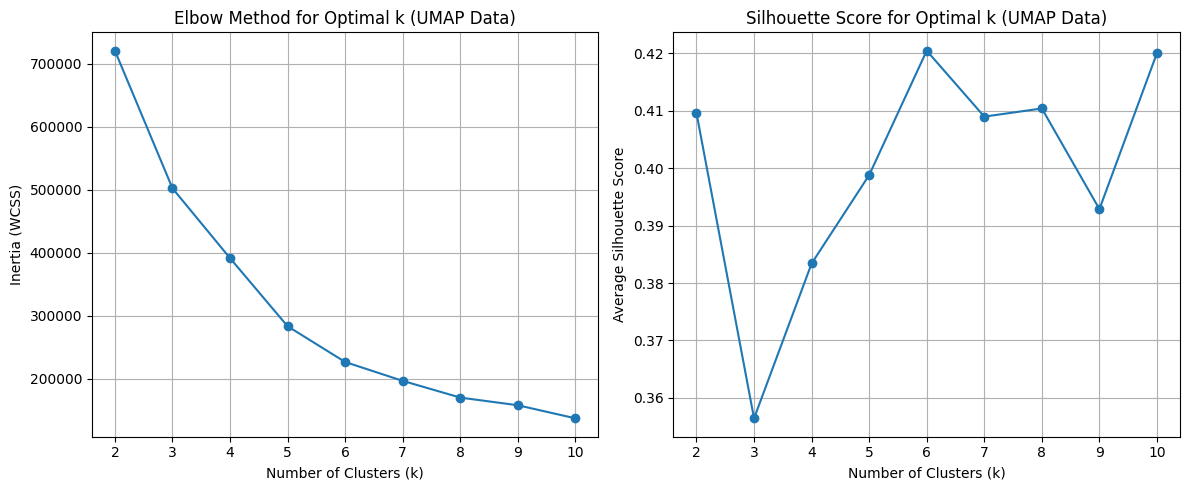

In [ ]:
plt.figure(figsize=(12, 5))

# a) Elbow Method 그래프
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal k (UMAP Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)

# b) Silhouette Score 그래프
plt.subplot(1, 2, 2)
valid_indices = ~np.isnan(silhouette_scores) # NaN 값 제외
valid_k = np.array(list(k_range))[valid_indices]
valid_scores = np.array(silhouette_scores)[valid_indices]
if len(valid_scores) > 0:
    plt.plot(valid_k, valid_scores, marker='o')
    plt.title('Silhouette Score for Optimal k (UMAP Data)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Average Silhouette Score')
    plt.xticks(valid_k)
    plt.grid(True)
else:
    plt.text(0.5, 0.5, 'No valid silhouette scores calculated.', ha='center', va='center')

plt.tight_layout()
plt.show()

### k값 지정 & 모델링

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
chosen_k = 6
print(f"\n그래프 분석 결과, 최적 k = {chosen_k} 로 K-Means 최종 실행...")

kmeans_final = KMeans(n_clusters=chosen_k, random_state=42, n_init='auto')
final_labels = kmeans_final.fit_predict(X_umap)


그래프 분석 결과, 최적 k = 6 로 K-Means 최종 실행...


### 클러스터 정보

In [17]:
if 'df' in locals():
    df['umap_kmeans_cluster'] = final_labels
    umap_df['umap_kmeans_cluster'] = final_labels
    print(f"\nDataFrame 'df'에 UMAP 기반 K-Means 결과 ('umap_kmeans_cluster') 추가 완료.")
    # 클러스터별 개수 확인
    print("\n최종 클러스터별 데이터 개수:")
    print(df['umap_kmeans_cluster'].value_counts().sort_index())
    print("\ndf head (with new cluster):")
else:
    # df가 없다면 umap_df를 만들고 추가
    umap_df = pd.DataFrame(X_umap, columns=['umap_x', 'umap_y'])
    umap_df['umap_kmeans_cluster'] = final_labels
    print(f"\n새로운 DataFrame 'umap_df' 생성 및 K-Means 결과 ('umap_kmeans_cluster') 추가 완료.")
    print("\n최종 클러스터별 데이터 개수:")
    print(umap_df['umap_kmeans_cluster'].value_counts().sort_index())
    print("\numap_df head:")
    print(umap_df.head())


DataFrame 'df'에 UMAP 기반 K-Means 결과 ('umap_kmeans_cluster') 추가 완료.

최종 클러스터별 데이터 개수:
umap_kmeans_cluster
0    16292
1     8512
2     8824
3    27051
4    14093
5    13994
Name: count, dtype: int64

df head (with new cluster):


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88766 entries, 0 to 88765
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   source               88766 non-null  object
 1   search_words         88766 non-null  object
 2   url                  81327 non-null  object
 3   title                30446 non-null  object
 4   contents             88766 non-null  object
 5   tagged_contents      88766 non-null  object
 6   vector               88766 non-null  object
 7   umap_kmeans_cluster  88766 non-null  int32 
dtypes: int32(1), object(7)
memory usage: 5.1+ MB


In [19]:
umap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88766 entries, 0 to 88765
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   umap_x               88766 non-null  float32
 1   umap_y               88766 non-null  float32
 2   umap_kmeans_cluster  88766 non-null  int32  
dtypes: float32(2), int32(1)
memory usage: 1.0 MB


### scatter 시각화


최종 K-Means 결과 시각화...


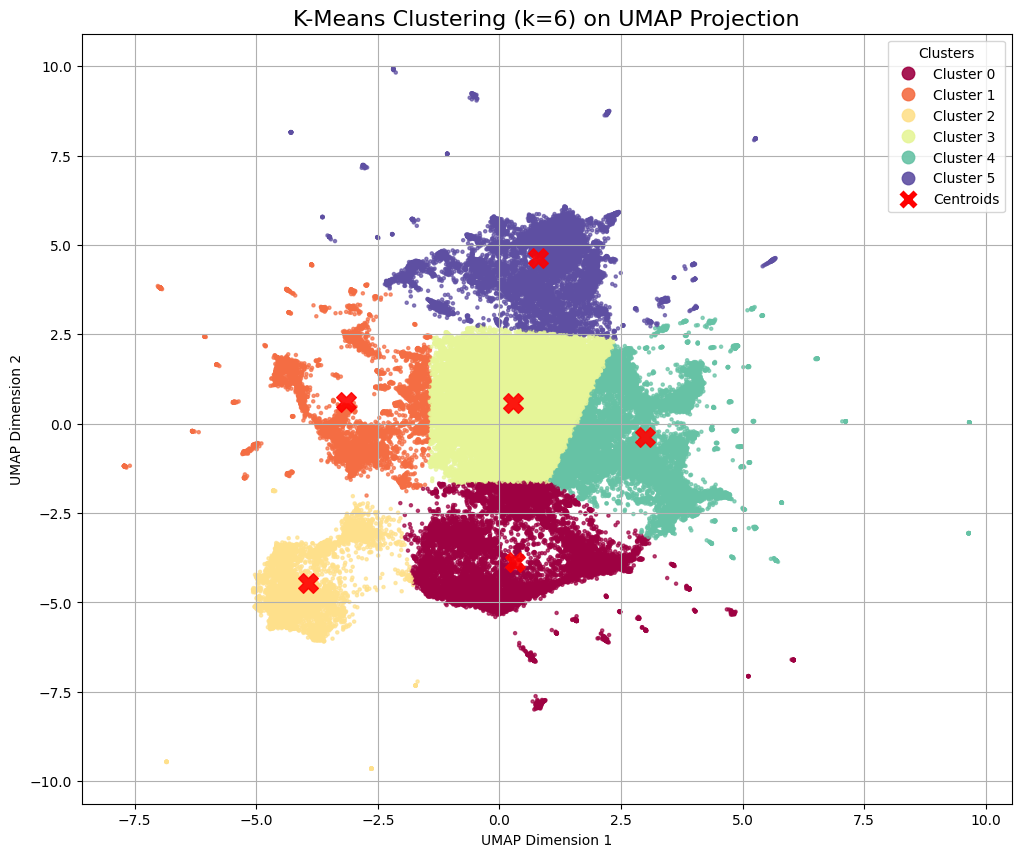

In [20]:
print("\n최종 K-Means 결과 시각화...")
plt.figure(figsize=(12, 10))

scatter_data_x = umap_df['umap_x']
scatter_data_y = umap_df['umap_y']
scatter_colors = umap_df['umap_kmeans_cluster']

scatter = plt.scatter(scatter_data_x,
                      scatter_data_y,
                      c=scatter_colors,
                      cmap='Spectral',
                      s=5,
                      alpha=0.7)

# 중심점 표시
centers = kmeans_final.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9, marker='X', label='Centroids')

plt.title(f'K-Means Clustering (k={chosen_k}) on UMAP Projection', fontsize=16)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.grid(True)

# 범례 추가
try:
    handles, labels = scatter.legend_elements(prop="colors", alpha=0.9)
    unique_labels = sorted(np.unique(final_labels))
    legend_labels = [f'Cluster {i}' for i in unique_labels]
    centroid_handle = plt.Line2D([0], [0], marker='X', color='w', label='Centroids',
                                     markerfacecolor='red', markersize=10)
    handles.append(centroid_handle)
    legend_labels.append('Centroids')
    plt.legend(handles, legend_labels, title="Clusters", loc='best', markerscale=1.5)
except Exception as e:
    print(f"범례 생성 중 오류 발생: {e}")

plt.show()

## TF-IDF

In [21]:
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

### 클러스터 단위 도큐먼트 만들기

In [22]:
all_documents = []
for i in df['umap_kmeans_cluster'].unique() :
    pos_tagged = df[df['umap_kmeans_cluster'] == i]['tagged_contents'] # 각 클러스터들을 하나의 문서로 가정

    # 하나의 string 으로 변환
    cluster_document = ''
    for pos in pos_tagged :
        doc = ' '.join(pos) + ' ' # 마지막에 띄어쓰기 추가
        cluster_document += doc

    all_documents.append(cluster_document)

### tf-idf 값 계산

In [23]:
# TF-IDF 객체 선언
vectorizer = TfidfVectorizer(ngram_range=(1, 2)) # bigram 사용
tfidf_matrix = vectorizer.fit_transform(all_documents)

# 사용될 단어
feature_names = vectorizer.get_feature_names_out()
# tfidf 값
value = tfidf_matrix.toarray()

# 데이터 프레임화
tfidf_df = pd.DataFrame(value, columns = feature_names)
tfidf_df

,가가,가가 가가,가가 가각,가가 가갸갸갸,가가 가격,가가 가기,가가 가까이,가가 가도,가가 가드,가가 가득,...,힝힝 채연,힝힝 출근,힝힝 키즈,힝힝 한번,힝힝 헝헝,힝힝 홍홍,힝힝 회색말,힝힝 후기,힝힝 흉내,힝힝 힝구
0,0.001745,0.000047,0.000000,0.00000,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000013,0.000000,0.000000,0.000000
1,0.001679,0.000000,0.000000,0.00000,0.000000,0.000026,0.000026,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000582,0.000008,0.000000,0.00000,0.000024,0.000000,0.000000,0.000000,0.000012,0.000010,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.001601,0.000045,0.000013,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000013,0.000013,0.000013,0.00000,0.00000,0.000013,0.000000,0.000013,0.000013,0.000000
4,0.000964,0.000000,0.000000,0.00001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000008,...,0.000000,0.000000,0.000000,0.00001,0.00001,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000820,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000023


In [24]:
# Transpose
tfidf_df_T = tfidf_df.T
tfidf_df_T

,0,1,2,3,4,5
가가,0.001745,0.001679,0.000582,0.001601,0.000964,0.000820
가가 가가,0.000047,0.000000,0.000008,0.000045,0.000000,0.000000
가가 가각,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000
가가 가갸갸갸,0.000000,0.000000,0.000000,0.000000,0.000010,0.000000
가가 가격,0.000000,0.000000,0.000024,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
힝힝 홍홍,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000
힝힝 회색말,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000
힝힝 후기,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000
힝힝 흉내,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000


### 주요 단어 확인

In [25]:
tfidf_df_T[0].sort_values(ascending = False)[ : 25]

아기    0.395017
아이    0.282253
시간    0.216664
우리    0.208631
엄마    0.202917
사람    0.191221
낮잠    0.186929
생각    0.183379
개월    0.137017
육아    0.127216
시작    0.118764
때문    0.111963
오늘    0.109793
마음    0.103709
수면    0.099483
정도    0.098694
남편    0.092580
다시    0.092210
하나    0.085235
정말    0.084356
이제    0.082724
아빠    0.080597
지금    0.077806
병원    0.075594
바로    0.073526
Name: 0, dtype: float64

In [26]:
tfidf_df_T[1].sort_values(ascending = False)[ : 25]

아기     0.455940
엄마     0.254701
이유식    0.212387
사진     0.193159
오늘     0.179261
우리     0.164138
육아     0.151265
개월     0.149329
낮잠     0.148816
아이     0.142380
시간     0.139115
아빠     0.127525
촬영     0.126033
재생     0.105919
생각     0.094399
정도     0.094143
아침     0.086844
준비     0.086062
시작     0.085013
일기     0.083509
정말     0.083241
진짜     0.082821
반찬     0.081713
이제     0.081014
조금     0.076478
Name: 1, dtype: float64

In [27]:
tfidf_df_T[2].sort_values(ascending = False)[ : 25]

아기         0.459900
이불         0.415393
낮잠         0.376251
사용         0.261764
낮잠 이불      0.259835
아이         0.150701
어린이집       0.144376
베개         0.133487
엄마         0.102797
제품         0.100911
우리         0.095739
육아         0.086528
패드         0.085075
신생아        0.073550
정말         0.072444
추천         0.072359
세탁         0.071365
매트         0.069778
생각         0.068784
어린이집 낮잠    0.065344
구매         0.065269
세트         0.065055
침대         0.064948
시간         0.062442
여름         0.060994
Name: 2, dtype: float64

In [28]:
tfidf_df_T[3].sort_values(ascending = False)[ : 25]

아기    0.368496
우리    0.244946
진짜    0.207676
엄마    0.206700
시간    0.190289
사진    0.184854
아이    0.158334
생각    0.129657
여행    0.128515
육아    0.127252
오늘    0.123831
아빠    0.123802
사람    0.123050
개월    0.119790
정말    0.108533
카페    0.107902
바로    0.106381
재생    0.103362
여기    0.102162
하나    0.098081
보고    0.096169
그냥    0.093621
아침    0.092255
낮잠    0.091893
이제    0.089339
Name: 3, dtype: float64

In [29]:
tfidf_df_T[4].sort_values(ascending = False)[ : 25]

아기       0.522569
낮잠       0.326294
엄마       0.249018
개월       0.244410
시간       0.189283
육아       0.186333
우리       0.141555
오늘       0.135924
수유       0.133449
시작       0.121785
아빠       0.109011
이유식      0.104367
수면       0.100494
개월 아기    0.097197
이제       0.094091
하루       0.084241
정도       0.084131
밤잠       0.083889
생각       0.082460
다시       0.079564
일기       0.078806
분유       0.078381
새벽       0.078231
아침       0.076025
진짜       0.074294
Name: 4, dtype: float64

In [30]:
tfidf_df_T[5].sort_values(ascending = False)[ : 25]

맛집     0.436232
메뉴     0.224590
주문     0.196534
고기     0.189099
아기     0.180234
카페     0.155200
테이블    0.129195
정말     0.125613
소스     0.125352
진짜     0.124382
방문     0.117938
시간     0.113956
주차     0.106482
식사     0.099307
서울     0.096025
하나     0.093734
바로     0.092854
추천     0.090893
아이     0.090372
식당     0.089532
음식     0.087971
의자     0.085259
사진     0.084709
생각     0.081427
저희     0.080647
Name: 5, dtype: float64

### csv로 저장

In [ ]:
for i in tfidf_df_T.columns :
    # 필터링해서 점수 높은 순으로 정렬하기
    tfidf_data = tfidf_df_T[i].sort_values(ascending = False)
    # 정렬한 데이터를 데이터프레임화 하기
    data_df = pd.DataFrame({'tfidf_word' : tfidf_data.index,
                            'tfidf_score' : tfidf_data.values })
    data_df.to_csv(f'pre_cluster{i}_tfidf_0511.csv', encoding = 'utf-8')

In [32]:
df.to_csv('pre_cluster_df_0511.csv', encoding='utf-8')

## 키워드 원문 맥락 보기

In [50]:
# 1. 특정 클러스터 및 단어 관련 분석 함수 정의 (기존 토큰 칼럼 활용)
"""
    이미 토큰화된 칼럼을 사용하여 특정 클러스터 내에서
    특정 단어의 빈도와 주변 맥락(원문 기반)을 분석합니다.

    Args:
        df (pd.DataFrame): 원본 데이터프레임.
        cluster_column_name (str): 클러스터 레이블이 있는 칼럼 이름.
        token_column_name (str): 명사 토큰 리스트가 있는 칼럼 이름.
        original_text_column_name (str): 원문 텍스트가 있는 칼럼 이름.
        cluster_label_to_inspect (int): 분석할 클러스터 번호.
        target_word (str): 분석할 특정 단어 (명사 토큰 형태).
        window_size_original (int): 원문에서 타겟 단어 주변을 볼 때 앞뒤로 볼 글자 수.
        max_contexts_per_doc (int): 한 문서 내에서 출력할 최대 컨텍스트(키워드 등장) 개수.
                                     None이면 제한 없음.
    """
def analyze_word_in_cluster_from_tokens(df, cluster_column_name,
                                        token_column_name, original_text_column_name,
                                        cluster_label_to_inspect, target_word,
                                        window_size_original=15,
                                        max_contexts_per_doc=3):
    
    print(f"--- 클러스터 {cluster_label_to_inspect}에서 '{target_word}' 단어 분석 (기존 토큰 활용) ---")
    print(f"(한 문서당 최대 {max_contexts_per_doc if max_contexts_per_doc is not None else '제한 없음'}개의 컨텍스트 출력)")


    df_cluster = df[df[cluster_column_name] == cluster_label_to_inspect].copy()

    if df_cluster.empty:
        print(f"클러스터 {cluster_label_to_inspect}에 해당하는 데이터가 없습니다.")
        return

    print(f"\n클러스터 {cluster_label_to_inspect}의 전체 문서 수: {len(df_cluster)}")

    all_tokens_in_cluster = []
    docs_with_target_word_indices = []

    for index, row in df_cluster.iterrows():
        tokens_cell_value = row[token_column_name]
        if isinstance(tokens_cell_value, list):
            tokens = tokens_cell_value
        elif pd.isna(tokens_cell_value):
            tokens = []
        else:
            tokens = []
        
        all_tokens_in_cluster.extend(tokens)
        if target_word in tokens:
            docs_with_target_word_indices.append(index)

    if not all_tokens_in_cluster:
        print("클러스터 내에 분석할 토큰이 없습니다.")
        return

    target_word_frequency = all_tokens_in_cluster.count(target_word)
    num_docs_containing_target = len(docs_with_target_word_indices)

    print(f"\n'{target_word}' 단어 빈도:")
    print(f"- 클러스터 내 총 등장 횟수 (명사 기준): {target_word_frequency}회")
    print(f"- '{target_word}' 단어가 포함된 문서 수: {num_docs_containing_target} / {len(df_cluster)}개 문서")

    print(f"\n'{target_word}' 단어 주변 내용 (원문 기반 Context):")
    if not docs_with_target_word_indices:
        print(f"'{target_word}' 단어가 포함된 문서를 찾을 수 없습니다.")
    else:
        for doc_original_index in docs_with_target_word_indices:
            original_text = df_cluster.loc[doc_original_index, original_text_column_name]
            if pd.isna(original_text):
                print(f"  문서 (원본 인덱스: {doc_original_index}): 원문 내용이 없습니다.")
                continue
            
            current_pos = 0
            found_contexts_for_this_doc = [] # 이 문서에서 찾은 컨텍스트들을 임시 저장
            contexts_printed_for_this_doc = 0 # 이 문서에서 이미 출력한 컨텍스트 수

            while True:
                try:
                    target_idx_in_original = original_text.index(target_word, current_pos)
                    
                    # max_contexts_per_doc 제한 로직 추가
                    if max_contexts_per_doc is not None and contexts_printed_for_this_doc >= max_contexts_per_doc:
                        found_contexts_for_this_doc.append(f"    ... (이 문서에서 '{target_word}' 추가 등장, {max_contexts_per_doc}개 초과로 생략) ...")
                        break # 이 문서에 대한 컨텍스트 검색 중단

                    start_idx = max(0, target_idx_in_original - window_size_original)
                    end_idx = min(len(original_text), target_idx_in_original + len(target_word) + window_size_original)

                    context_before = original_text[start_idx : target_idx_in_original]
                    context_after = original_text[target_idx_in_original + len(target_word) : end_idx]

                    found_contexts_for_this_doc.append(f"    ... {context_before}[**{target_word.upper()}**]{context_after} ...")
                    contexts_printed_for_this_doc += 1
                    current_pos = target_idx_in_original + 1 
                except ValueError: 
                    break
            
            if found_contexts_for_this_doc:
                print(f"\n  문서 (원본 인덱스: {doc_original_index}):")
                for ctx in found_contexts_for_this_doc: # 저장된 컨텍스트 출력
                    print(ctx)
            elif target_word in df_cluster.loc[doc_original_index, token_column_name]:
                current_tokens_for_doc = df_cluster.loc[doc_original_index, token_column_name]
                if isinstance(current_tokens_for_doc, list) and target_word in current_tokens_for_doc:
                     print(f"\n  문서 (원본 인덱스: {doc_original_index}): 토큰 '{target_word}'은 존재하지만, 원문에서 정확한 문자열 매칭을 찾지 못했습니다. 원문: \"{original_text[:100]}...\"")

    print("-" * 50)

In [64]:
analyze_word_in_cluster_from_tokens(
    df=df,
    cluster_column_name='umap_kmeans_cluster',
    token_column_name='tagged_contents',             # 명사 토큰이 있는 칼럼
    original_text_column_name='contents', # 원문 텍스트가 있는 칼럼
    cluster_label_to_inspect=2,
    target_word='침대',                         # 분석할 명사
    window_size_original=40,                     # 원문에서 앞뒤로 20글자씩 보기
    max_contexts_per_doc=2
)

--- 클러스터 2에서 '침대' 단어 분석 (기존 토큰 활용) ---
(한 문서당 최대 2개의 컨텍스트 출력)

클러스터 2의 전체 문서 수: 8824

'침대' 단어 빈도:
- 클러스터 내 총 등장 횟수 (명사 기준): 172회
- '침대' 단어가 포함된 문서 수: 98 / 8824개 문서

'침대' 단어 주변 내용 (원문 기반 Context):

  문서 (원본 인덱스: 1267):
    ... 비숙소. 애기랑 여행다니다보니 에어비앤비숙소가 진짜 딱이에요. 거의 저상[**침대**]나 온돌이라 좋고 물건도 많이 없어서 치울게없어요. 그리고 5분거리에 바 ...

  문서 (원본 인덱스: 1982):
    ... 주문하고 화장실 가는 길에 발견한 수유실! 이렇게 아기 귀저기갈아 주는 [**침대**]?도 있고 안에 전자레인지부터 해서 세면대 아기 엄마 모두 편안할 쇼파까 ...

  문서 (원본 인덱스: 2878):
    ...  저녁은 딱히 먹고 싶지가 않다. 오히려 좋을지도?. 새로바뀐 우리아기 [**침대**]. 제이디홈드레싱 5월에 어디갈까어디갈까 고민만 하다가 부천에 있는 백만 ...

  문서 (원본 인덱스: 2889):
    ... 가족인가??? 가운데가 아기곰인가보죵 모자에 잠옷까지 진짜 너무 귀여운 [**침대**]방 곰도리 3마리 여기에도 좌석이 딱 1테이블이 있더라구용? 그래서 궁금 ...
    ... 이구 이정도면 BBBB로 했어야하는거아니냐며 베어도 넣어 주라주 곰돌이 [**침대**]방도 벽난로 갬성도 모두 3층이에용 어디서... 타는 냄새 안나여...? ...

  문서 (원본 인덱스: 4878):
    ...  17 00 브레이크타임 편의 단체석 포장 남녀화장실 구분 아기의자 아기[**침대**] 대기실 안 편의시설 테이블링 주차는 골목주차 가능 50m NAVER C ...
    ...  비치되어있으니 필요하신분들은 가져다 쓰시면 되요 글고 둘러보다보니 아기[**침대**]가 !!!.. 대박 테이블에 머리끈도 비치가 되어있어요 센

## 노이즈 제거 후 df 저장

In [53]:
cluster_to_exclude = 2

In [55]:
final_df = df[df['umap_kmeans_cluster'] != cluster_to_exclude].copy()

In [56]:
print("\n2번 클러스터 제외 후 데이터프레임 (final_df):")
print(final_df)
print(f"\nfinal_df의 클러스터 분포:\n{final_df['umap_kmeans_cluster'].value_counts().sort_index()}")

if cluster_to_exclude in final_df['umap_kmeans_cluster'].unique():
    print(f"\n오류: {cluster_to_exclude}번 클러스터가 여전히 final_df에 존재합니다.")
else:
    print(f"\n성공: {cluster_to_exclude}번 클러스터가 final_df에서 성공적으로 제외되었습니다.")


2번 클러스터 제외 후 데이터프레임 (final_df):
      source search_words                                              url  \
0        블로그        아기+잠깨      https://blog.naver.com/srhymin/223091161466   
1        블로그        아기+잠깨       https://blog.naver.com/sukm83/223091879514   
2        블로그        아기+잠깨  https://blog.naver.com/dldptmf5134/223096875782   
3        블로그        아기+잠깨      https://blog.naver.com/lia1100/223095799488   
4        블로그        아기+잠깨   https://blog.naver.com/perfect_aj/223095824533   
...      ...          ...                                              ...   
88760   블라인드        낮잠+육아                                              NaN   
88761   블라인드        낮잠+육아                                              NaN   
88762   블라인드        낮잠+육아                                              NaN   
88764   블라인드        낮잠+육아                                              NaN   
88765   블라인드        낮잠+육아                                              NaN   

      title                   

In [57]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79942 entries, 0 to 88765
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   source               79942 non-null  object
 1   search_words         79942 non-null  object
 2   url                  72542 non-null  object
 3   title                30015 non-null  object
 4   contents             79942 non-null  object
 5   tagged_contents      79942 non-null  object
 6   vector               79942 non-null  object
 7   umap_kmeans_cluster  79942 non-null  int32 
dtypes: int32(1), object(7)
memory usage: 5.2+ MB


In [58]:
final_df['umap_kmeans_cluster'].value_counts()

umap_kmeans_cluster
3    27051
0    16292
4    14093
5    13994
1     8512
Name: count, dtype: int64

In [59]:
final_df.to_csv('final_df_0511.csv', encoding='utf-8-sig', index=False)